### 회귀 실습 1. 자전거 대여 수요 예측
- X: 여러 개 피처, y: count

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
bike_df = pd.read_csv('05/bikesharing/train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info() #결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
bike_df.dtypes #datetime을 제외 모두 숫자형

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

- datetime 칼럼은 object(문자)형이므로, 이를 datetime 형태로 변환!(중요)

In [5]:
#pd.to_datetime
bike_df['datetime']=bike_df['datetime'].apply(pd.to_datetime)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
#datetime 타입에서 년, 월, 일, 시간 추출(주의: 따로 bike_df['datetime'].year 이렇게 적용하면 안나옴. apply lambda 사용!)
bike_df['year']=bike_df['datetime'].apply(lambda x : x.year)
bike_df['month']=bike_df['datetime'].apply(lambda x : x.month)
bike_df['day']=bike_df['datetime'].apply(lambda x : x.day)
bike_df['hour']=bike_df['datetime'].apply(lambda x : x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [8]:
#'datetime' ,casual','registered' 칼럼 삭제
bike_df.drop(['datetime','casual','registered'],axis=1,inplace=True)

In [9]:
print(bike_df.dtypes)
bike_df.head()

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


- 회귀 모델의 예측 성능을 평가하는 함수!
- (cf.이전에 했던 것은 cross_val_score를 이용해서 cv와 평가까지 한번에 했던 것이고 이번에는 우리가 직접 지표만듦)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#RMSLE 반환
def rmsle(y, pred):
    #로그변환
    log_y =np.log1p(y)
    log_pred = np.log1p(pred)
    #MSLE
    squared_error = (log_y - log_pred)**2 #(실제-예측값)^2 #여러개의 값->밑에서 평균내고, 루트씌우면
    #RMSLE
    rmsle = np.sqrt(np.mean(squared_error)) 
    return rmsle

#RMSE 반환
def rmse(y,pred):
    rmse = np.sqrt(mean_squared_error(y,pred)) #squared_error = (y-pred)**2 
                                                                            #rmse = np.sqrt(np.mean(squared_error)) 이렇게 직접 만들어도됨.
    return rmse
    

In [11]:
#한번에 MAE, RMSE, RMSLE 반환 함수
def evaluate_reg(y, pred):
    rmsle_val=rmsle(y, pred)
    rmse_val = rmse(y,pred)
    mae_val= mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

- 회귀 모델에 적용

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [13]:
y_df = bike_df['count']
X_df = bike_df.drop('count', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=0)

In [14]:
print(type(X_train)) ###참고! train,test셋에서 X는 전부 df이고 y는 전부 series임.왜냐면 y는 1개만 떼어냈으니까!!
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
#선형회귀 모델
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_reg(y_test, pred) #결과를 보면 오류값이 꽤 큰 편..bad..

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [16]:
#y_test(실제값)와 pred(예측값)를 집어넣었을 때, 그 차이를 계산하고 차이가 큰것부터 5개 뽑기

def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count']) ##여기서 이름에 'count'가 들어가는 이유는 숫자를 센다는게 아니고 target 칼럼 이름이 count라서임.
    result_df['pred_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['pred_count'])
    
    display(result_df.sort_values(by='diff',ascending=False)[:n_tops]) #df형태로 뽑아내려면 print(array형태 출력)보단 display가 굿

In [17]:
get_top_error_data(y_test, pred, n_tops=5) #값 차이 상위 5개를 보면 550이 넘어가므로 꽤 많이 차이가 남.->이 경우 y값의 분포가 왜곡됐는지 확인!

,real_count,pred_count,diff
1618,890,322.0,568.0
3151,798,241.0,557.0
966,884,327.0,557.0
412,745,194.0,551.0
2817,856,310.0,546.0


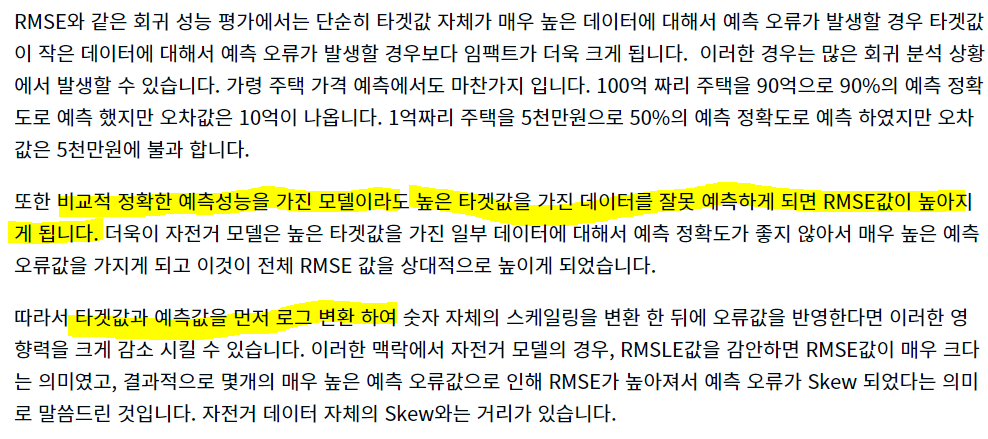

#### 데이터 전처리: X(원-핫 인코딩), y(로그변환)
##### 1. 선형회귀 모델(linear, 릿지, 라쏘) 

- y값의 분포는 정규분포인 것이 가장 좋음

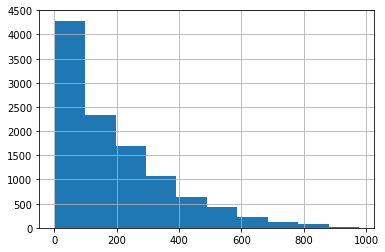

In [18]:
#df.hist()
y_df.hist() #왜곡돼있음.

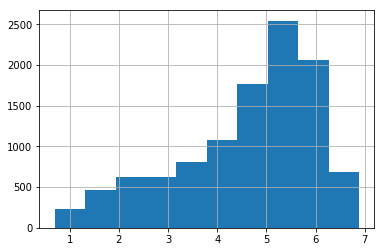

In [19]:
#y(타겟) 값을 정규분포화: 로그변환. (보통 정규화, 표준화, 로그변환 등 다양하지만 y에는 로그변환을 가장 많이 적용)
y_log = np.log1p(y_df)
y_log.hist()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_log, test_size=.3, random_state=0)

#선형회귀 모델
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#평가 시, y(y_train, y_test)는 전부 로그변환이 되어있으므로 
 ## y_test는 다시 원래 스케일로 변환
y_test_exp = np.expm1(y_test)
 ##예측값도 다시 원래 스케일로 변환
pred_exp = np.expm1(pred)

evaluate_reg(y_test_exp, pred_exp) #결과를 보면 오류값이 많이 줄진 않음. 심지어 RMSE는 더늘었다..?

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


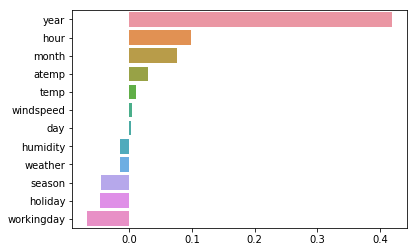

In [21]:
#각 피처별 회귀계수 값 시각화
coef = pd.Series(data = lr_reg.coef_, index = X_df.columns)
coef_top = coef.sort_values(ascending=False) #내림차순
sns.barplot(coef_top.values, coef_top.index)

- year의 회귀계수가 왜이렇게 클까? year에 따라 count가 이렇게 많이 변동하다니??? 말이 안됨.
- 이것은 바로 year가 숫자형(연속형)으로 되어 있기 때문. but, year는 명목변수(범주형). "선형회귀 적용시엔 숫자형에 원-핫 인코딩 적용해야됨!"
- (참고로, 원-핫 인코딩과 더미변수화는 다른 말이다.(둘다 아예 피처를 새로 만드는 것이지만, 원-핫인코딩은 특정피처의 클래스값 개수만큼, 더미는 개수-1만큼 만들기 때문))

In [22]:
#year뿐 아니라 모든 숫자형 피처를 원핫인코딩 적용->pd.get_dummies()
X_df_oh = pd.get_dummies(X_df, columns=['year','month','hour','holiday','workingday','season','weather'])
X_df_oh.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


In [23]:
X_df_oh.dtypes

temp            float64
atemp           float64
humidity          int64
windspeed       float64
day               int64
year_2011         uint8
year_2012         uint8
month_1           uint8
month_2           uint8
month_3           uint8
month_4           uint8
month_5           uint8
month_6           uint8
month_7           uint8
month_8           uint8
month_9           uint8
month_10          uint8
month_11          uint8
month_12          uint8
hour_0            uint8
hour_1            uint8
hour_2            uint8
hour_3            uint8
hour_4            uint8
hour_5            uint8
hour_6            uint8
hour_7            uint8
hour_8            uint8
hour_9            uint8
hour_10           uint8
hour_11           uint8
hour_12           uint8
hour_13           uint8
hour_14           uint8
hour_15           uint8
hour_16           uint8
hour_17           uint8
hour_18           uint8
hour_19           uint8
hour_20           uint8
hour_21           uint8
hour_22         

In [24]:
#train/test를 다시 함. X_df_oh를 넣고!
X_train, X_test, y_train, y_test = train_test_split(X_df_oh, y_log, test_size=.3, random_state=0)

#모델을 3개 넣을것임. 모델, 학습-테스트 데이터를 넣으면 평가 결과를 반환하는 함수
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False): #is_expm1은 true인 경우 y_df에 로그변환을 적용했다는 뜻
    #학습
    model.fit(X_train, y_train)
    #예측
    pred = model.predict(X_test)
    #y에 로그변환을 했다면
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
    print('####', model.__class__.__name__, '####')
    evaluate_reg(y_test, pred)

In [25]:
#모델 3개
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

#모델을 각각 get_model_predict 안에 넣어서 평가 결과를 반환.
models = [lr_reg, ridge_reg, lasso_reg]
for i in models:
    get_model_predict(i, X_train, X_test, y_train, y_test, is_expm1=True) #우리는 앞에서 y에 로그변환 했으므로 True 쓰기

#### LinearRegression ####
RMSLE: 0.589, RMSE: 97.484, MAE: 63.106
#### Ridge ####
RMSLE: 0.589, RMSE: 98.407, MAE: 63.648
#### Lasso ####
RMSLE: 0.634, RMSE: 113.031, MAE: 72.658


- 결과를 보면, 모든 모델에서 이전보다 오류가 줄어듦. 셋중에선 선형회귀가 가장 good
- 원-핫 인코딩된 데이터 세트(X_df_oh)에서 각 피처별 회귀계수를 시각화

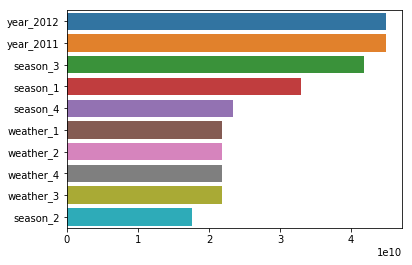

In [26]:
#각 피처별 회귀계수 값 시각화
coef = pd.Series(np.abs(lr_reg.coef_) , index=X_df_oh.columns) ##책에 없음) 회귀계수가 양수인 것으로만 높게 나와서 절댓값을 씌워줘야 정확!
coef_sort = coef.sort_values(ascending=False)[:10] #내림차순
sns.barplot(x=coef_sort.values , y=coef_sort.index) #이전과는 달리 year말고 다른 변수들의 회귀계수값이 높게 나옴

##### 2. 회귀트리 모델

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [28]:
# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

In [29]:
for i in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(i, X_train, X_test, y_train, y_test, is_expm1=True) #앞에서 이미 원핫인코딩한 X와 로그변환한 y를 넣어서 모델 돌린 것임.

#### RandomForestRegressor ####
RMSLE: 0.353, RMSE: 50.696, MAE: 31.446
#### GradientBoostingRegressor ####
RMSLE: 0.341, RMSE: 55.802, MAE: 34.346
[15:12:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


#### XGBRegressor ####
RMSLE: 0.346, RMSE: 56.474, MAE: 34.917
#### LGBMRegressor ####
RMSLE: 0.316, RMSE: 46.473, MAE: 28.777


### ----------------------------------------------------------------------------------------------------------------------- ?? <추가>
- 회귀계수 시각화 한 것이 책과 다른 문제
############해결책 1. 원핫인코딩시 year 삭제(저자의견) , 2.회귀계수 넣을때 np.abs() 쓰기
- https://www.inflearn.com/questions/17518
##### but, 아직도 돌릴 때마다 회귀계수가 달라지는지는 의문. score(성능평가한) 는 전부 같게 나오는데..->해결하면 추가 부탁!

In [30]:
X_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


- 참고(category타입): https://nittaku.tistory.com/124

In [31]:
#앞에서는 X에 원핫인코딩을 적용했는데, 범주형 자료로 바로 변환해보자.(다른방식!)
categoricalFeatureNames =['year','month','hour','holiday','workingday','season','weather']
for var in categoricalFeatureNames:
    X_df[var] = X_df[var].astype("category")

In [32]:
X_df.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
year          category
month         category
day              int64
hour          category
dtype: object

In [33]:
#train/test를 다시 함. X_df_oh를 넣고!
X_train, X_test, y_train, y_test = train_test_split(X_df, y_log, test_size=.3, random_state=0)

#모델을 3개 넣을것임. 모델, 학습-테스트 데이터를 넣으면 평가 결과를 반환하는 함수
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False): #is_expm1은 true인 경우 y_df에 로그변환을 적용했다는 뜻
    #학습
    model.fit(X_train, y_train)
    #예측
    pred = model.predict(X_test)
    #y에 로그변환을 했다면
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
    print('####', model.__class__.__name__, '####')
    evaluate_reg(y_test, pred)

In [34]:
#모델 3개
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

#모델을 각각 get_model_predict 안에 넣어서 평가 결과를 반환.
models = [lr_reg, ridge_reg, lasso_reg]
for i in models:
    get_model_predict(i, X_train, X_test, y_train, y_test, is_expm1=True) #우리는 앞에서 y에 로그변환 했으므로 True 쓰기

#### LinearRegression ####
RMSLE: 1.017, RMSE: 162.594, MAE: 109.286
#### Ridge ####
RMSLE: 1.017, RMSE: 162.591, MAE: 109.280
#### Lasso ####
RMSLE: 1.018, RMSE: 162.751, MAE: 109.365


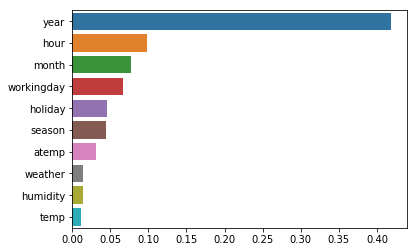

In [35]:
#각 피처별 회귀계수 값 시각화
coef = pd.Series(np.abs(lr_reg.coef_) , index=X_df.columns) ##책에 없음) 회귀계수가 양수인 것으로만 높게 나와서 절댓값을 씌워줘야 정확!
coef_sort = coef.sort_values(ascending=False)[:10] #내림차순
sns.barplot(x=coef_sort.values , y=coef_sort.index) #이전과 같은 결과..ㅜㅜ

- 결과: category로 타입 변환을 하더라도, 여전히 year가 월등하게 높은 회귀계수를 가지고 있었고,
- 성능 평가 지표로 확인을 해봐도 결과가 더 안좋았음.(더 높았다.)
- -->그러니 선형회귀에 적용시에는 범주형 자료를 category형으로 변환하지 말고, 원-핫 인코딩을 적용하자!

- 참고: https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
- (캐글 컴퍼티션에 참여했던 링크, 여러 모델 사용 후 성능 평가)